# A simple Buy-on-dip algo for Alpaca API
This is a simple algo that trades every day refreshing portfolio based on the EMA ranking. Among the universe (e.g. SP500 stocks), it ranks by daily (price - EMA) percentage as of trading time and keep positions in sync with lowest ranked stocks.

The rationale behind this: low (price - EMA) vs price ratio indicates there is a big dip in a short time. Since the universe is SP500 which means there is some fundamental strengths, the belief is that the price should be recovered to some extent. Let's get started by setting up our enviroment.

## Setup
First you need to set your environment variables for the rest api. The rest api uses environment variables to when executing a call to the rest api. If you see an error referring to the rest.api() call this is most likely the origin.

First we need to Verify packages are correct by installing from pip file in `~\StockBot\S&P500BOD\`
```
$ pip install -p
```
If you run into errors double check the Pipfile.lock for all dependency versions.
After you have the dependencies and environment variables set be sure to restart the jupyter notebooks application.

Were almost at the point of being able to run the code. The next step is to import our api key into the files that contain the algorithm. Open the file `~\StockBot\S&P500BOD\samplealgo\algo.py` and input your `key_id` and `secret_key` as well as the `base_url` that matches your alpaca api account. 

The section of code starts near line 12 and looks like the following:

`
api = tradeapi.REST(
    key_id='',
    secret_key='',
    base_url='https://paper-api.alpaca.markets'
)
`

Next run the following chunk of python code.
It will automagically set your environment variables for the rest api calls.

In [1]:
import os
os.environ["APCA_API_BASE_URL"] = " "
os.environ["APCA_API_KEY_ID"] = " "
os.environ["APCA_API_SECRET_KEY"] = " " 

In [ ]:
print ('Base url: ', os.environ["APCA_API_BASE_URL"] )
print ('key:', os.environ["APCA_API_KEY_ID"] )
print ('secret:', os.environ["APCA_API_SECRET_KEY"] )

## Running the code.
First lets take a look at what btest is doing under the hood to get a better understanding of what's happening.
Looking at the function Headers inside the `class Account` we can see there are `__init__(cash), balance_hist(), performance(), set_benchmark(), update(), fill_order(), `. It looks like `balance_hist() and performance() `could be use full for examining data after execution. It looks like `balance_hsit()` rturns `pd.DataFrame(data, index=series.index)` which is a pandas dataframe of the balance history for the backtest. `performance()` returns a dataframe of `df[[c for c in df.columns if c.endswith('perf')]`. It looks like this performance measure is returning the performance for each stock over time. Along with these function calls we can extrack the objects variables which include `cash, positions, trades, equities, _benchmark`. Well examine these after running the back test.


The btest module takes a default argument of `starting_cash` when creating the object. The object has stored values which we will be extracting from the object after running btest.py. This is where jupyter-notebooks comes in handy for running multiple code segments. Lets set up our test and execute a run. 

In [ ]:
from samplealgo import algo, btest
import os
account = btest.simulate(500)

In [4]:
print(account.cash)
print(account.positions)

123.79829999999788
{'KR': {'entry_timestamp': Timestamp('2019-03-12 00:00:00-0400', tz='America/New_York'), 'entry_price': 24.77, 'shares': 4.0}, 'NWS': {'entry_timestamp': Timestamp('2019-03-15 00:00:00-0400', tz='America/New_York'), 'entry_price': 12.82, 'shares': 7.0}, 'BWA': {'entry_timestamp': Timestamp('2019-03-15 00:00:00-0400', tz='America/New_York'), 'entry_price': 37.9, 'shares': 2.0}, 'ROST': {'entry_timestamp': Timestamp('2019-03-15 00:00:00-0400', tz='America/New_York'), 'entry_price': 89.09, 'shares': 1.0}, 'KHC': {'entry_timestamp': Timestamp('2019-03-15 00:00:00-0400', tz='America/New_York'), 'entry_price': 31.95, 'shares': 3.0}}


Looks like our ending account balance was 123.798 after running the backtest. You can also see the 'current portfolio' of the simulated portfolio. Now lets get a handle on the equities. The equities is a dictionary object with the equity amount at each time stamp.

In [5]:
account.equities

{Timestamp('2017-03-20 00:00:00-0400', tz='America/New_York'): 500,
 Timestamp('2017-03-21 00:00:00-0400', tz='America/New_York'): 499.24999999999994,
 Timestamp('2017-03-22 00:00:00-0400', tz='America/New_York'): 492.7199999999999,
 Timestamp('2017-03-23 00:00:00-0400', tz='America/New_York'): 496.41999999999996,
 Timestamp('2017-03-24 00:00:00-0400', tz='America/New_York'): 497.62999999999994,
 Timestamp('2017-03-27 00:00:00-0400', tz='America/New_York'): 497.93999999999994,
 Timestamp('2017-03-28 00:00:00-0400', tz='America/New_York'): 497.99999999999994,
 Timestamp('2017-03-29 00:00:00-0400', tz='America/New_York'): 503.74,
 Timestamp('2017-03-30 00:00:00-0400', tz='America/New_York'): 510.92,
 Timestamp('2017-03-31 00:00:00-0400', tz='America/New_York'): 509.28,
 Timestamp('2017-04-03 00:00:00-0400', tz='America/New_York'): 510.63,
 Timestamp('2017-04-04 00:00:00-0400', tz='America/New_York'): 511.9599999999999,
 Timestamp('2017-04-05 00:00:00-0400', tz='America/New_York'): 511.03

Wow so it looks like our bot was able to make a little bit of money on its strategy over the course of 2 years. This startegy could definitley use improvements. Lets take a look at a graph of this time series

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


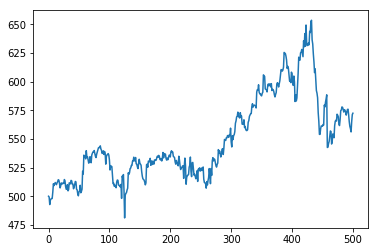

In [7]:
import matplotlib.pyplot as plt
plt.plot(list(account.equities.values()))

Looks like our stock performed fairly well up to day 425 where it lost almost all of its profit. It would be interesting to see how the algorithm would recuperate given more data. it looks like the algorithm spotted a trend and found a good curve to ride but only more training can tell.

To start optimizing this algorithm you should go into algo.py and adjust indicators and guides for the algorithm. A good place to start would be in the `def calc_scores()` function. This is the guiding principle behind the buy and sell logic. 

```
param = 10

ema = df.close.ewm(span=param).mean()[dayindex]
last = df.close.values[dayindex]
diff = (last - ema) / last
diffs[symbol] = diff
```

It looks like it is calculating the close ema mean() based off of a span of `10`. 
It then returns a sorted dictionary of the diff's according to the diff amount. This is later used to rank the stocks for placement in a queue of whether to buy or not. We can see the logic in the code chunk from the `def get_orders()` function in the file `algo.py`
```
ranked = calc_scores(price_df)
to_buy = set()
to_sell = set()
account = api.get_account()
# take the top one twentieth out of ranking,
# excluding stocks too expensive to buy a share
for symbol, _ in ranked[:len(ranked) // 20]:
    price = float(price_df[symbol].close.values[-1])
    if price > float(account.cash):
        continue
    to_buy.add(symbol) 
```

From here it follows a script to decide what to sell.
```
# now get the current positions and see what to buy,
    # what to sell to transition to today's desired portfolio.
    positions = api.list_positions()
    logger.info(positions)
    holdings = {p.symbol: p for p in positions}
    holding_symbol = set(holdings.keys())
    to_sell = holding_symbol - to_buy
    to_buy = to_buy - holding_symbol
    orders = []
```

We can see it sets the to_sell to any items in your current holdings that are not in the buy list already. 
This is some simple logic that proves to work well over time. It simply states as long as we want to buy the stock that day we hold onto it, otherwise we sell it and buy the highest ranked stock not already in our buy list.